<a href="https://colab.research.google.com/github/saipragna25/deep-learning-data-augmentation-assignment/blob/main/DL_regularizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the necessary libraries and load the dataset:

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers, layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


4422102/4422102 [==============================] - 0s 0us/step


function to build neural network model with regularization options

In [ ]:
def create_model(regularization=None, l1_factor=0.01, l2_factor=0.01):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    if regularization == 'l1':
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(l1_factor)))
    elif regularization == 'l2':
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_factor)))
    elif regularization == 'l1_l2':
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_factor, l2=l2_factor)))
    else:
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


training and evaluating  models with L1&L2 regularization techniques

In [ ]:
#No regularization
model_no_reg = create_model()
history_no_reg=model_no_reg.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_no_reg.evaluate(x_test, y_test)
print(f"Test accuracy without regularization: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 19s 11ms/step - loss: 0.5217 - accuracy: 0.8165 - val_loss: 0.4163 - val_accuracy: 0.8509
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3923 - accuracy: 0.8581 - val_loss: 0.3843 - val_accuracy: 0.8642
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3515 - accuracy: 0.8717 - val_loss: 0.3690 - val_accuracy: 0.8682
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3199 - accuracy: 0.8825 - val_loss: 0.3430 - val_accuracy: 0.8788
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3007 - accuracy: 0.8887 - val_loss: 0.3446 - val_accuracy: 0.8764
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2894 - accuracy: 0.8933 - val_loss: 0.3354 - val_accuracy: 0.8803
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2750 - accuracy: 0.8975 - val_loss: 0.3388 - val_accurac

In [ ]:
#L1 Regularization
model_l1 = create_model(regularization='l1', l1_factor=0.001)
history_l1=model_l1.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_l1.evaluate(x_test, y_test)
print(f"Test accuracy with L1 regularization: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 1.3142 - accuracy: 0.7775 - val_loss: 0.8371 - val_accuracy: 0.8056
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8281 - accuracy: 0.8029 - val_loss: 0.7600 - val_accuracy: 0.8141
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.7580 - accuracy: 0.8154 - val_loss: 0.7064 - val_accuracy: 0.8276
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7165 - accuracy: 0.8216 - val_loss: 0.7405 - val_accuracy: 0.8111
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6919 - accuracy: 0.8249 - val_loss: 0.7103 - val_accuracy: 0.8204
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6791 - accuracy: 0.8279 - val_loss: 0.6584 - val_accuracy: 0.8302
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6687 - accuracy: 0.8311 - val_loss: 0.6440 - val_accuracy

In [ ]:
#L2 Regularization
model_l2 = create_model(regularization='l2', l2_factor=0.001)
history_l2=model_l2.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_l2.evaluate(x_test, y_test)
print(f"Test accuracy with L2 regularization: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6789 - accuracy: 0.8092 - val_loss: 0.6222 - val_accuracy: 0.7992
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5242 - accuracy: 0.8465 - val_loss: 0.5119 - val_accuracy: 0.8460
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4889 - accuracy: 0.8536 - val_loss: 0.4798 - val_accuracy: 0.8565
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4677 - accuracy: 0.8593 - val_loss: 0.4600 - val_accuracy: 0.8599
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4572 - accuracy: 0.8626 - val_loss: 0.4937 - val_accuracy: 0.8539
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4490 - accuracy: 0.8644 - val_loss: 0.4964 - val_accuracy: 0.8490
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4433 - accuracy: 0.8685 - val_loss: 0.4400 - val_accuracy

In [ ]:
#L1 and L2 regularization combined
model_l1_l2 = create_model(regularization='l1_l2', l1_factor=0.001, l2_factor=0.001)
history_l1_l2=model_l1_l2.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_l1_l2.evaluate(x_test, y_test)
print(f"Test accuracy with L1 and L2 regularization combined: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 1.3000 - accuracy: 0.7781 - val_loss: 0.8698 - val_accuracy: 0.8049
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8334 - accuracy: 0.8044 - val_loss: 0.7716 - val_accuracy: 0.8165
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7668 - accuracy: 0.8127 - val_loss: 0.7973 - val_accuracy: 0.7864
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7310 - accuracy: 0.8198 - val_loss: 0.7227 - val_accuracy: 0.8190
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.7029 - accuracy: 0.8248 - val_loss: 0.6784 - val_accuracy: 0.8321
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6804 - accuracy: 0.8274 - val_loss: 0.6582 - val_accuracy: 0.8392
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6678 - accuracy: 0.8309 - val_loss: 0.6568 - val_accuracy:

dropout regularization

In [ ]:
#Applying droupout regularization at input,hidden and both layers
def create_model_dropout(dropout_position=None, dropout_rate=0.5):
    model = models.Sequential()
    
    if dropout_position == 'input':
        model.add(layers.Dropout(dropout_rate, input_shape=(28, 28)))
        model.add(layers.Flatten())
    else:
        model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(128, activation='relu'))
    
    if dropout_position == 'hidden' or dropout_position == 'both':
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
num_epochs = 10

# Train models and store their histories
model_no_reg = create_model()
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_dropout_input = create_model_dropout(dropout_position='input', dropout_rate=0.5)
history_dropout_input = model_dropout_input.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_dropout_hidden = create_model_dropout(dropout_position='hidden', dropout_rate=0.5)
history_dropout_hidden = model_dropout_hidden.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_dropout_both = create_model_dropout(dropout_position='both', dropout_rate=0.5)
history_dropout_both = model_dropout_both.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5204 - accuracy: 0.8183 - val_loss: 0.4668 - val_accuracy: 0.8305
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3898 - accuracy: 0.8590 - val_loss: 0.3646 - val_accuracy: 0.8677
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3477 - accuracy: 0.8728 - val_loss: 0.3830 - val_accuracy: 0.8639
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3215 - accuracy: 0.8819 - val_loss: 0.3399 - val_accuracy: 0.8783
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3015 - accuracy: 0.8892 - val_loss: 0.3604 - val_accuracy: 0.8660
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2893 - accuracy: 0.8926 - val_loss: 0.3280 - val_accuracy: 0.8829
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2747 - accuracy: 0.8986 - val_loss: 0.3348 - val_accuracy

In [ ]:
def plot_loss(history, label):
    fig, ax = plt.subplots(figsize=(12, 6))
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = np.arange(1, len(loss) + 1)
        
    plt.plot(epochs, loss, label=f"{label} - loss")
    plt.plot(epochs, val_loss, label=f"{label} - val_loss")
    
    plt.title('Loss and Validation Loss of Models with Different Dropout Regularizations')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()


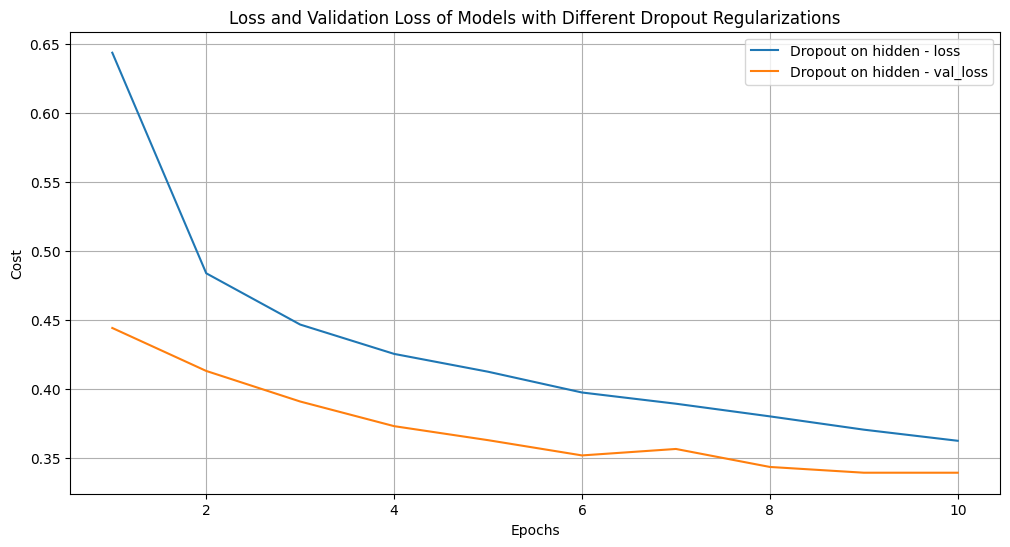

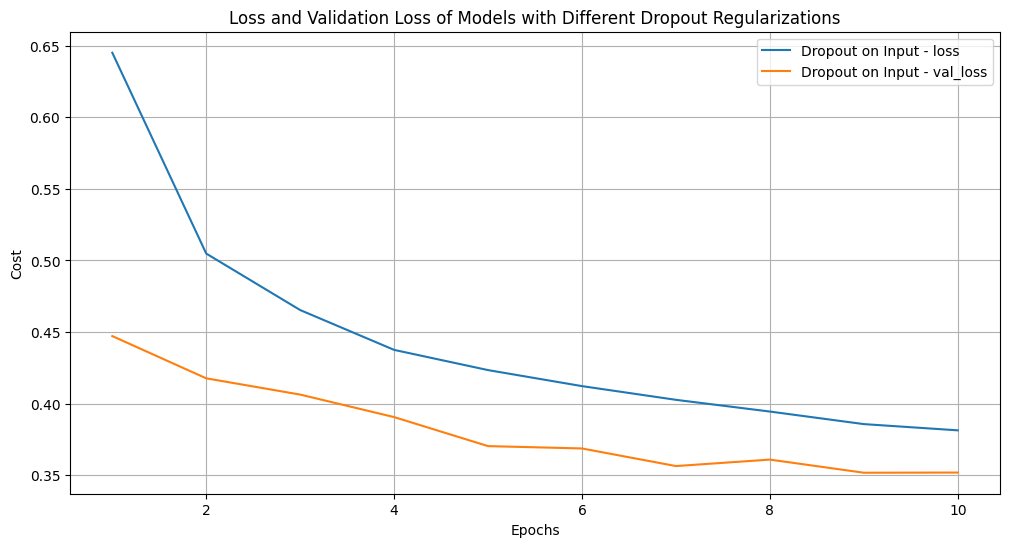

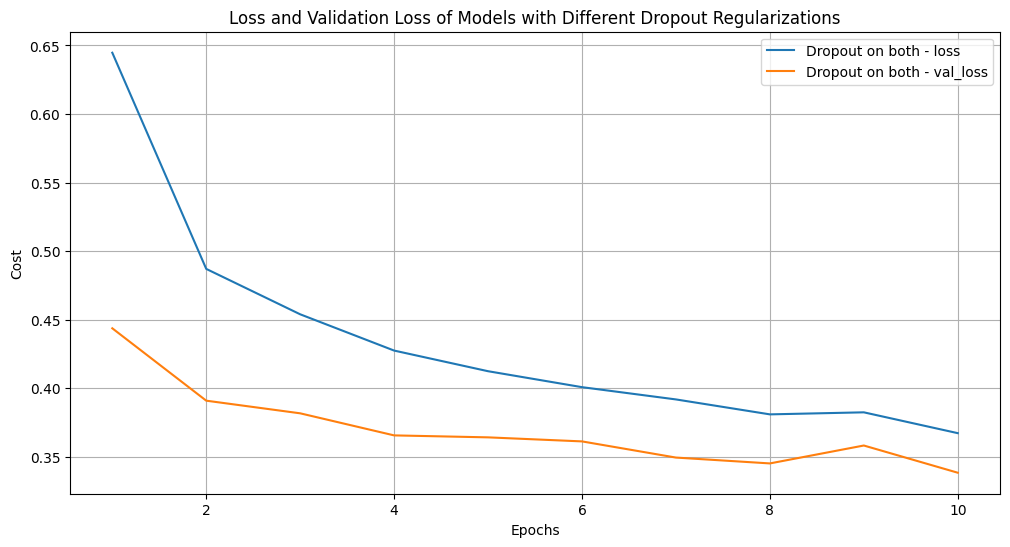

In [ ]:

plot_loss(history_dropout_hidden, 'Dropout on hidden')
plot_loss(history_dropout_input, 'Dropout on Input')
plot_loss(history_dropout_both, 'Dropout on both')

EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
num_epochs = 50  # Increase the number of epochs since early stopping will be applied

model_earlystp = create_model()
history_early_stopping = model_earlystp.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5208 - accuracy: 0.8167 - val_loss: 0.4142 - val_accuracy: 0.8545
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3887 - accuracy: 0.8603 - val_loss: 0.3833 - val_accuracy: 0.8640
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3462 - accuracy: 0.8752 - val_loss: 0.3576 - val_accuracy: 0.8695
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3223 - accuracy: 0.8817 - val_loss: 0.3468 - val_accuracy: 0.8739
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2998 - accuracy: 0.8896 - val_loss: 0.3364 - val_accuracy: 0.8772
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2870 - accuracy: 0.8941 - val_loss: 0.3358 - val_accuracy: 0.8787
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2724 - accuracy: 0.8985 - val_loss: 0.3399 - val_accuracy:

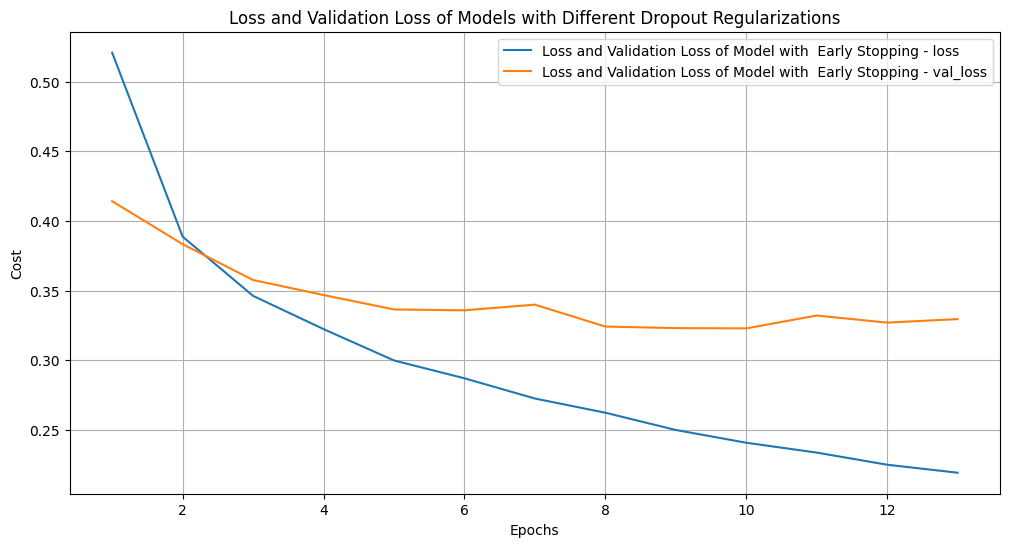

In [ ]:
plot_loss(history_early_stopping, 'Loss and Validation Loss of Model with  Early Stopping')


Monte Carlo Dropout Regularization

In [ ]:
from tensorflow.keras.layers import Layer

In [ ]:

class MCDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(MCDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs):
        return layers.Dropout(self.rate)(inputs, training=True)

def create_model_mc_dropout(dropout_position=None, dropout_rate=0.5):
    model = models.Sequential()
    
    if dropout_position == 'input':
        model.add(MCDropout(dropout_rate, input_shape=(28, 28)))
        model.add(layers.Flatten())
    else:
        model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(128, activation='relu'))
    
    if dropout_position == 'hidden' or dropout_position == 'both':
        model.add(MCDropout(dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
num_epochs = 10

model_mc_dropout_input = create_model_mc_dropout(dropout_position='input', dropout_rate=0.5)
model_mc_dropout_input.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_mc_dropout_hidden = create_model_mc_dropout(dropout_position='hidden', dropout_rate=0.5)
model_mc_dropout_hidden.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_mc_dropout_both = create_model_mc_dropout(dropout_position='both', dropout_rate=0.5)
model_mc_dropout_both.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 11s 4ms/step - loss: 0.6436 - accuracy: 0.7685 - val_loss: 0.5450 - val_accuracy: 0.8023
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5043 - accuracy: 0.8153 - val_loss: 0.5013 - val_accuracy: 0.8085
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4632 - accuracy: 0.8270 - val_loss: 0.4577 - val_accuracy: 0.8356
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4376 - accuracy: 0.8369 - val_loss: 0.4443 - val_accuracy: 0.8382
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4234 - accuracy: 0.8408 - val_loss: 0.4348 - val_accuracy: 0.8396
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4119 - accuracy: 0.8451 - val_loss: 0.4303 - val_accuracy: 0.8400
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4029 - accuracy: 0.8490 - val_loss: 0.4218 - val_accuracy

In [ ]:
def monte_carlo_predictions(model, x, num_forward_passes=50):
    predictions = np.zeros((num_forward_passes, x.shape[0], 10))

    for i in range(num_forward_passes):
        predictions[i] = model.predict(x)

    return np.mean(predictions, axis=0)


In [ ]:
mc_preds_input = monte_carlo_predictions(model_mc_dropout_input, x_test)
mc_preds_hidden = monte_carlo_predictions(model_mc_dropout_hidden, x_test)
mc_preds_both = monte_carlo_predictions(model_mc_dropout_both, x_test)


313/313 [==============================] - 1s 2ms/step


In [ ]:
test_acc_mc_input = np.mean(np.argmax(mc_preds_input, axis=1) == y_test)
test_acc_mc_hidden = np.mean(np.argmax(mc_preds_hidden, axis=1) == y_test)
test_acc_mc_both = np.mean(np.argmax(mc_preds_both, axis=1) == y_test)


various initializations 



In [ ]:
def create_model(initializer):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation='relu', kernel_initializer=initializer))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
num_epochs = 10

# Random Uniform Initialization
initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)
model_random_uniform = create_model(initializer)
history_random_uniform = model_random_uniform.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5207 - accuracy: 0.8193 - val_loss: 0.4026 - val_accuracy: 0.8578
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3891 - accuracy: 0.8613 - val_loss: 0.3869 - val_accuracy: 0.8567
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3494 - accuracy: 0.8734 - val_loss: 0.3765 - val_accuracy: 0.8637
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3245 - accuracy: 0.8820 - val_loss: 0.3368 - val_accuracy: 0.8790
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3062 - accuracy: 0.8896 - val_loss: 0.3508 - val_accuracy: 0.8735
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2915 - accuracy: 0.8923 - val_loss: 0.3349 - val_accuracy: 0.8827
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2791 - accuracy: 0.8968 - val_loss: 0.3414 - val_accuracy:

In [ ]:
# Random Normal Initialization
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
model_random_normal = create_model(initializer)
history_random_normal = model_random_normal.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5208 - accuracy: 0.8170 - val_loss: 0.4325 - val_accuracy: 0.8485
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3913 - accuracy: 0.8598 - val_loss: 0.3903 - val_accuracy: 0.8600
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3467 - accuracy: 0.8735 - val_loss: 0.3581 - val_accuracy: 0.8715
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3243 - accuracy: 0.8794 - val_loss: 0.3643 - val_accuracy: 0.8649
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3025 - accuracy: 0.8882 - val_loss: 0.3683 - val_accuracy: 0.8693
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2884 - accuracy: 0.8939 - val_loss: 0.3202 - val_accuracy: 0.8852
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2766 - accuracy: 0.8963 - val_loss: 0.3353 - val_accuracy:

In [ ]:
# Glorot Uniform Initialization
initializer = tf.keras.initializers.GlorotUniform()
model_glorot_uniform = create_model(initializer)
history_glorot_uniform = model_glorot_uniform.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5118 - accuracy: 0.8200 - val_loss: 0.4337 - val_accuracy: 0.8432
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3852 - accuracy: 0.8609 - val_loss: 0.3613 - val_accuracy: 0.8693
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3457 - accuracy: 0.8738 - val_loss: 0.3805 - val_accuracy: 0.8580
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3193 - accuracy: 0.8813 - val_loss: 0.3429 - val_accuracy: 0.8783
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2995 - accuracy: 0.8894 - val_loss: 0.3530 - val_accuracy: 0.8748
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2853 - accuracy: 0.8944 - val_loss: 0.3263 - val_accuracy: 0.8836
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2718 - accuracy: 0.8991 - val_loss: 0.3204 - val_accuracy:

In [ ]:
# Glorot Normal Initialization
initializer = tf.keras.initializers.GlorotNormal()
model_glorot_normal = create_model(initializer)
history_glorot_normal = model_glorot_normal.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5202 - accuracy: 0.8165 - val_loss: 0.4136 - val_accuracy: 0.8554
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3886 - accuracy: 0.8614 - val_loss: 0.3782 - val_accuracy: 0.8597
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3482 - accuracy: 0.8727 - val_loss: 0.3569 - val_accuracy: 0.8693
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3242 - accuracy: 0.8808 - val_loss: 0.3416 - val_accuracy: 0.8717
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3014 - accuracy: 0.8899 - val_loss: 0.3304 - val_accuracy: 0.8801
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2848 - accuracy: 0.8942 - val_loss: 0.3273 - val_accuracy: 0.8808
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.8986 - val_loss: 0.3207 - val_accuracy:

In [ ]:
# He Uniform Initialization
initializer = tf.keras.initializers.HeUniform()
model_he_uniform = create_model(initializer)
history_he_uniform = model_he_uniform.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5148 - accuracy: 0.8187 - val_loss: 0.4180 - val_accuracy: 0.8537
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3823 - accuracy: 0.8621 - val_loss: 0.3966 - val_accuracy: 0.8538
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3442 - accuracy: 0.8755 - val_loss: 0.3606 - val_accuracy: 0.8670
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3161 - accuracy: 0.8842 - val_loss: 0.3650 - val_accuracy: 0.8702
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2994 - accuracy: 0.8891 - val_loss: 0.3349 - val_accuracy: 0.8803
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2812 - accuracy: 0.8965 - val_loss: 0.3263 - val_accuracy: 0.8836
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2702 - accuracy: 0.8998 - val_loss: 0.3225 - val_accuracy:

In [ ]:
# He Normal Initialization
initializer = tf.keras.initializers.HeNormal()
model_he_normal = create_model(initializer)
history_he_normal = model_he_normal.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5189 - accuracy: 0.8185 - val_loss: 0.4096 - val_accuracy: 0.8562
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3870 - accuracy: 0.8610 - val_loss: 0.3727 - val_accuracy: 0.8633
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3445 - accuracy: 0.8746 - val_loss: 0.3849 - val_accuracy: 0.8599
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3199 - accuracy: 0.8828 - val_loss: 0.3372 - val_accuracy: 0.8768
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3008 - accuracy: 0.8890 - val_loss: 0.3399 - val_accuracy: 0.8798
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2859 - accuracy: 0.8953 - val_loss: 0.3243 - val_accuracy: 0.8825
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2710 - accuracy: 0.8989 - val_loss: 0.3462 - val_accuracy:

Batch Normalization

In [ ]:
def create_model(initializer, use_batch_norm=False):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(128, kernel_initializer=initializer))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
initializer = tf.keras.initializers.HeNormal()
model_he_normal_bn = create_model(initializer, use_batch_norm=True)
history_he_normal_bn = model_he_normal_bn.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4815 - accuracy: 0.8307 - val_loss: 0.4142 - val_accuracy: 0.8478
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3700 - accuracy: 0.8658 - val_loss: 0.3633 - val_accuracy: 0.8668
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3336 - accuracy: 0.8790 - val_loss: 0.3563 - val_accuracy: 0.8723
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3084 - accuracy: 0.8869 - val_loss: 0.3479 - val_accuracy: 0.8765
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2894 - accuracy: 0.8944 - val_loss: 0.3375 - val_accuracy: 0.8772
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2754 - accuracy: 0.8984 - val_loss: 0.3293 - val_accuracy: 0.8810
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2588 - accuracy: 0.9056 - val_loss: 0.3404 - val_accuracy:

Custom Dropout and Custom Regularization

In [ ]:
from tensorflow.keras.layers import Layer

class CustomDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs):
        return layers.Dropout(self.rate)(inputs, training=True)


In [ ]:
from tensorflow.keras import backend as K

def custom_l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))


In [ ]:
#model
def create_model(use_custom_dropout=False, custom_dropout_rate=0.5, use_custom_l1_reg=False):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    if use_custom_l1_reg:
        kernel_regularizer = custom_l1_reg
    else:
        kernel_regularizer = None
        
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=kernel_regularizer))
    
    if use_custom_dropout:
        model.add(CustomDropout(custom_dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#creating and training models
num_epochs = 10

model_custom_dropout = create_model(use_custom_dropout=True, custom_dropout_rate=0.5)
history_custom_dropout = model_custom_dropout.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_custom_l1_reg = create_model(use_custom_l1_reg=True)
history_custom_l1_reg = model_custom_l1_reg.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6455 - accuracy: 0.7732 - val_loss: 0.5223 - val_accuracy: 0.8121
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4832 - accuracy: 0.8260 - val_loss: 0.4707 - val_accuracy: 0.8321
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4506 - accuracy: 0.8372 - val_loss: 0.4461 - val_accuracy: 0.8363
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4286 - accuracy: 0.8441 - val_loss: 0.4413 - val_accuracy: 0.8413
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4157 - accuracy: 0.8495 - val_loss: 0.4319 - val_accuracy: 0.8487
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4002 - accuracy: 0.8539 - val_loss: 0.4370 - val_accuracy: 0.8456
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3935 - accuracy: 0.8562 - val_loss: 0.4276 - val_accuracy:

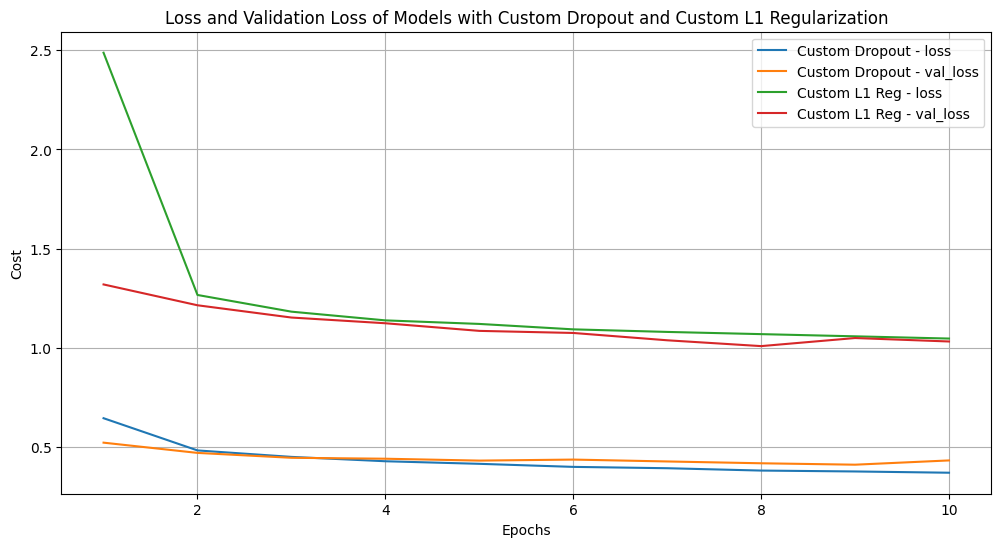

In [ ]:
def plot_custom_loss(histories, labels):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for history, label in zip(histories, labels):
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = np.arange(1, len(loss) + 1)
        
        plt.plot(epochs, loss, label=f"{label} - loss")
        plt.plot(epochs, val_loss, label=f"{label} - val_loss")
    
    plt.title('Loss and Validation Loss of Models with Custom Dropout and Custom L1 Regularization')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

histories = [history_custom_dropout, history_custom_l1_reg]
labels = ["Custom Dropout", "Custom L1 Reg"]

plot_custom_loss(histories, labels)
